In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 6                #number of agents
N_buckets = 60              #number of buckets
max_turns = 120             #max number of moves in single game
N_actions = 60              #number of possible actions
sabotage_buckets = False    #sabaotage some buckets when true
rn_seed = 15                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents, N_actions, 
    sabotage_buckets=sabotage_buckets)
print 'environment = ', environment
actions = initialize_actions(N_agents, N_buckets, N_actions)
actions.tail()

environment =  {'sabotage_buckets': False, 'max_turns': 120, 'N_agents': 6, 'rn_seed': 15, 'N_buckets': 60, 'bucket_params': {'p0': array([ 0.        ,  0.00033898,  0.00067797,  0.00101695,  0.00135593,
        0.00169492,  0.0020339 ,  0.00237288,  0.00271186,  0.00305085,
        0.00338983,  0.00372881,  0.0040678 ,  0.00440678,  0.00474576,
        0.00508475,  0.00542373,  0.00576271,  0.00610169,  0.00644068,
        0.00677966,  0.00711864,  0.00745763,  0.00779661,  0.00813559,
        0.00847458,  0.00881356,  0.00915254,  0.00949153,  0.00983051,
        0.01016949,  0.01050847,  0.01084746,  0.01118644,  0.01152542,
        0.01186441,  0.01220339,  0.01254237,  0.01288136,  0.01322034,
        0.01355932,  0.01389831,  0.01423729,  0.01457627,  0.01491525,
        0.01525424,  0.01559322,  0.0159322 ,  0.01627119,  0.01661017,
        0.01694915,  0.01728814,  0.01762712,  0.0179661 ,  0.01830508,
        0.01864407,  0.01898305,  0.01932203,  0.01966102,  0.02      ]), 's

,action,locations
55,55,"32, 35, 37, 40, 47, 56"
56,56,"20, 28, 44, 53, 53, 57"
57,57,"27, 39, 41, 42, 47, 59"
58,58,"25, 31, 45, 50, 57, 59"
59,59,"11, 37, 49, 53, 59, 59"


In [6]:
#initialize state
state = initialize_state(environment, actions)
print 'state = ', state

state =  {'agent_value': array([ 1.,  1.,  1.,  1.,  1.,  1.]), 'previous_bucket_productivity': array([  0.00000000e+00,   7.78997849e-04,   1.35306634e-03,
         2.47927489e-03,  -5.17912309e-05,   1.45608093e-03,
         3.58890762e-03,   2.08527668e-03,   1.47138597e-04,
         1.28852175e-04,   4.28227409e-03,   6.81208632e-03,
         7.31617922e-03,   1.03261388e-02,   5.46175793e-03,
         4.61038643e-03,  -1.58590692e-03,   1.03973622e-02,
         9.29219707e-03,   1.02751453e-02,   5.71886603e-03,
         1.16602692e-02,   1.53265546e-02,   1.00788563e-02,
         7.82304848e-03,  -2.66156690e-04,   1.38190134e-02,
         6.29631611e-03,   3.22158090e-02,  -1.08282380e-02,
         1.69166028e-02,  -9.98637576e-03,   6.24261729e-03,
         1.32904984e-02,   1.72123336e-02,   3.50157916e-02,
         1.83057097e-02,   6.79505694e-05,   1.82439828e-02,
         6.38067342e-03,   1.72714874e-02,   3.22339869e-02,
        -5.01896310e-03,  -1.28349805e-02,   1.392

In [7]:
#illustrate moving agents
action = 1
state_next = update_agents(state, action, actions, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state_next =  {'agent_value': array([ 1.02128611,  1.00142148,  1.00240058,  1.00231082,  1.00044686,  1.        ]), 'previous_bucket_productivity': array([  0.00000000e+00,   7.47259956e-05,   1.01700020e-03,
         1.42147893e-03,   1.85864381e-03,  -1.07992191e-03,
         2.31082375e-03,  -8.20475453e-04,   3.53129669e-03,
         2.71089521e-03,   1.08526875e-02,   1.04786375e-03,
         3.39341127e-03,   2.40058031e-03,   6.93155131e-03,
         1.02838656e-02,   2.20365205e-03,   2.77607088e-03,
         9.19324432e-03,  -5.27552997e-03,   1.44760362e-02,
         1.08390930e-02,  -1.40113391e-03,   9.92991263e-03,
         2.04145066e-03,   4.46860889e-04,   5.02614031e-03,
         1.02489220e-02,   2.21760486e-03,   1.89243113e-02,
         1.30239597e-02,   2.57047031e-02,   3.64058785e-03,
         1.17826892e-02,   2.08951253e-02,   1.03878925e-02,
         4.27862827e-02,   1.60291496e-02,   7.10434575e-03,
         3.83601294e-02,   1.58654608e-02,   1.00128664e-0

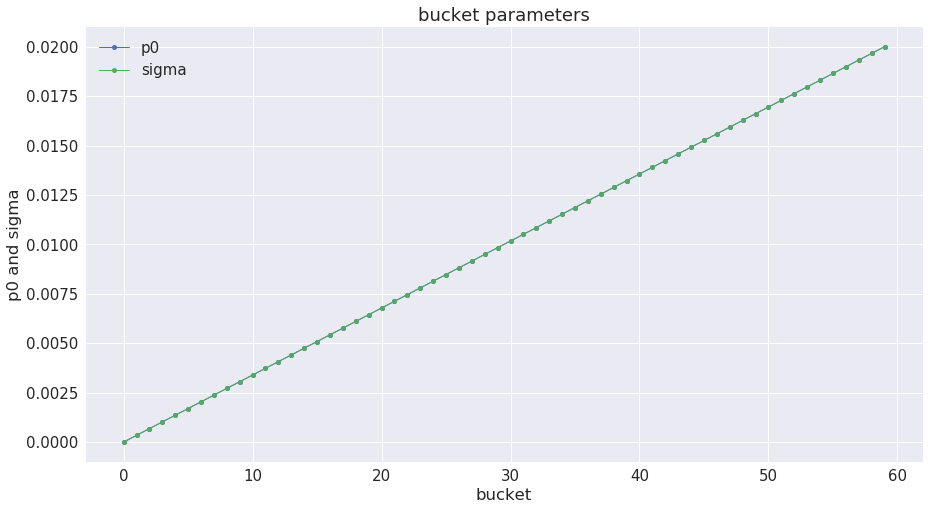

In [8]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=5, label='sigma')
p = ax.legend()

In [9]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, actions, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  120


,turn,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,1,6.042391,1.008619,1.001347,1.006701,1.019957,0.999066,1.006701
1,2,6.131274,1.014837,1.012589,1.013523,1.020592,1.020125,1.049610
2,3,6.222712,1.048187,1.041978,1.020132,1.023753,1.039052,1.049610
3,4,6.294639,1.048939,1.042819,1.042315,1.046015,1.042546,1.072005
4,5,6.364959,1.057816,1.052366,1.058168,1.066330,1.038020,1.092259


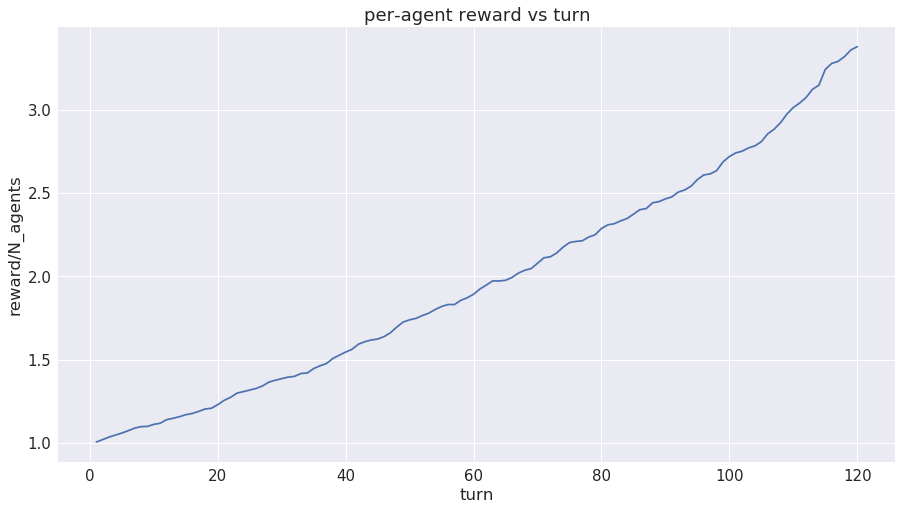

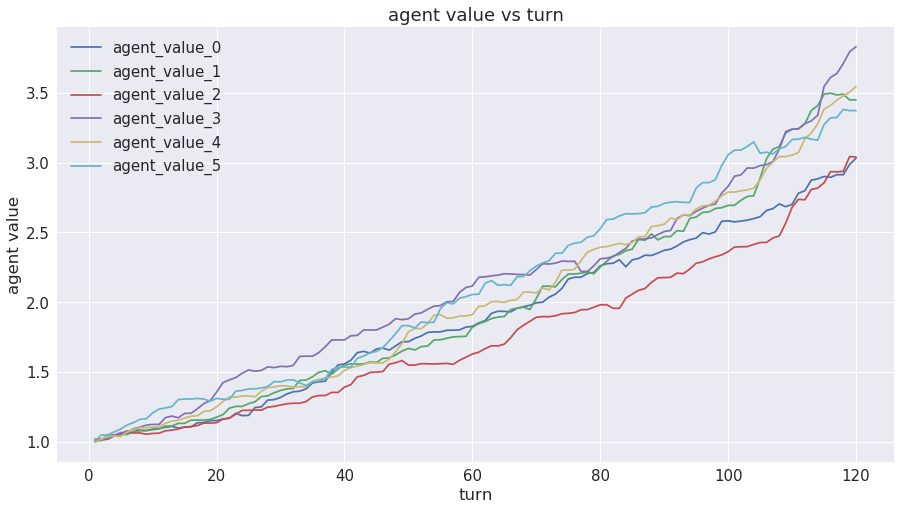

In [10]:
#plot relative reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/N_agents')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

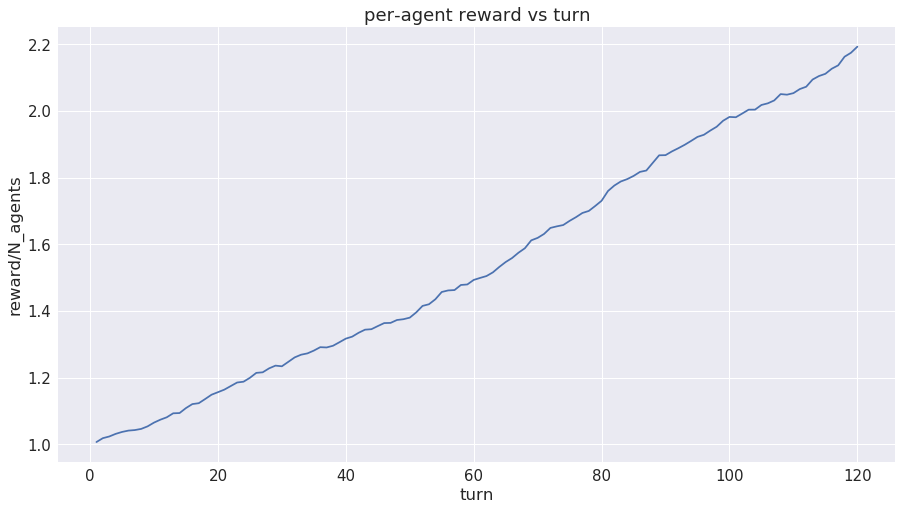

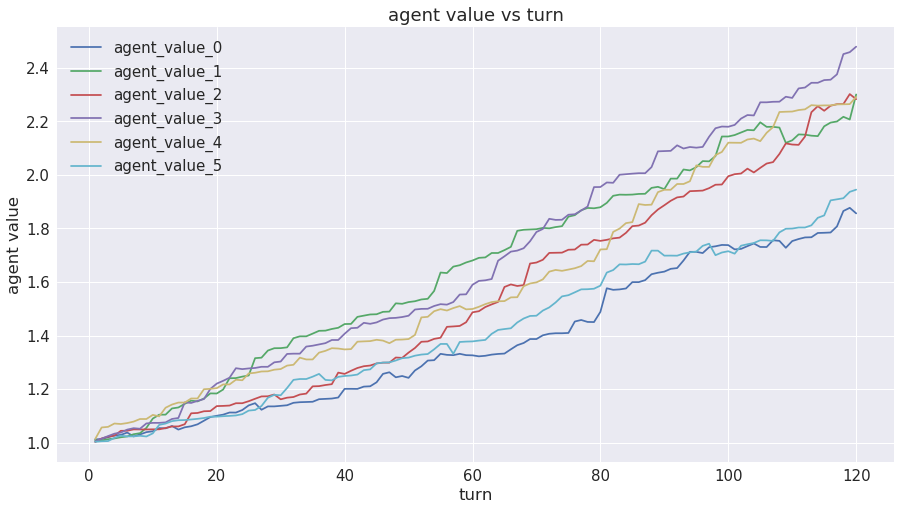

In [11]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, actions, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/N_agents')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

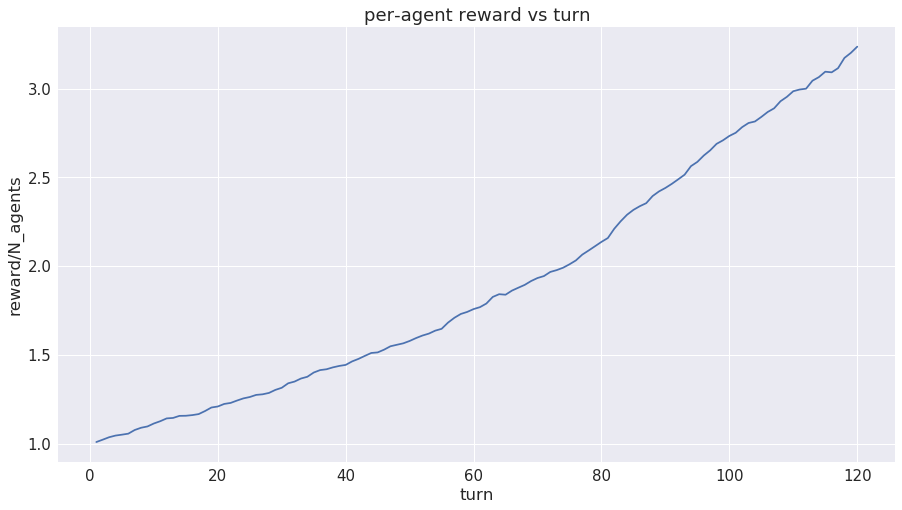

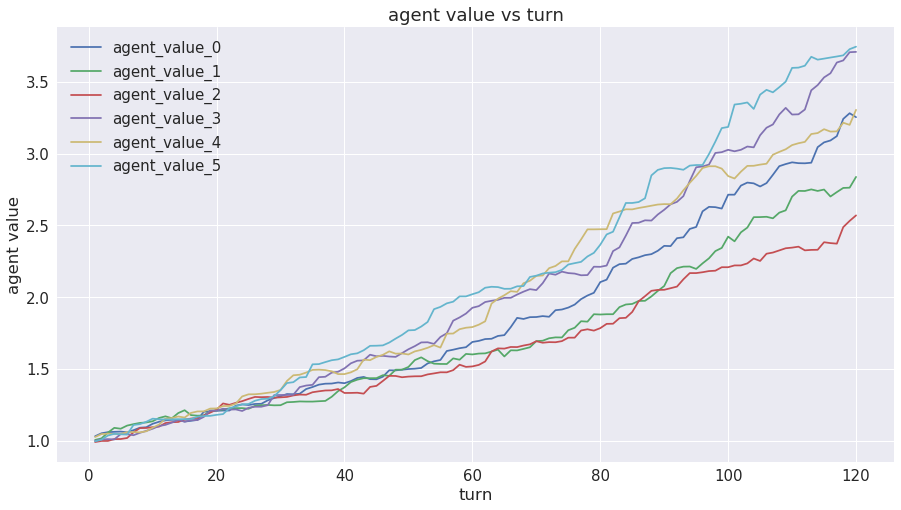

In [12]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, actions, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/N_agents')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

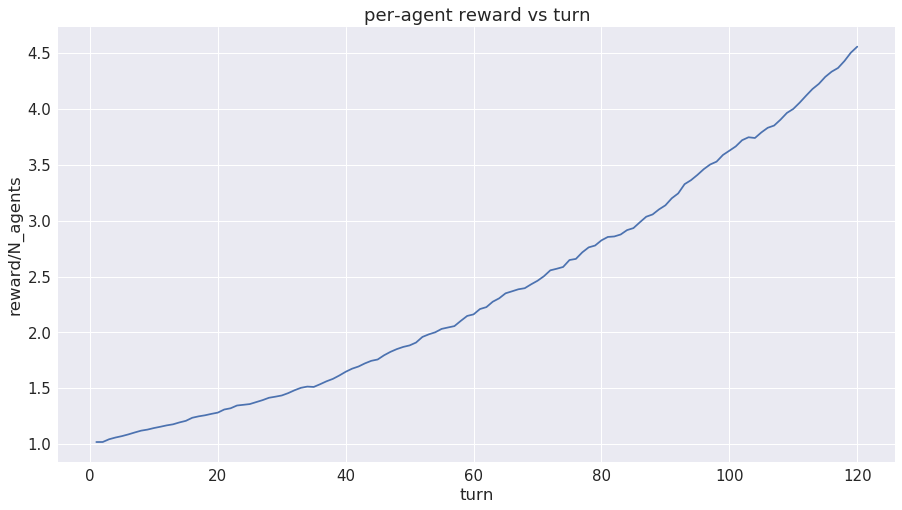

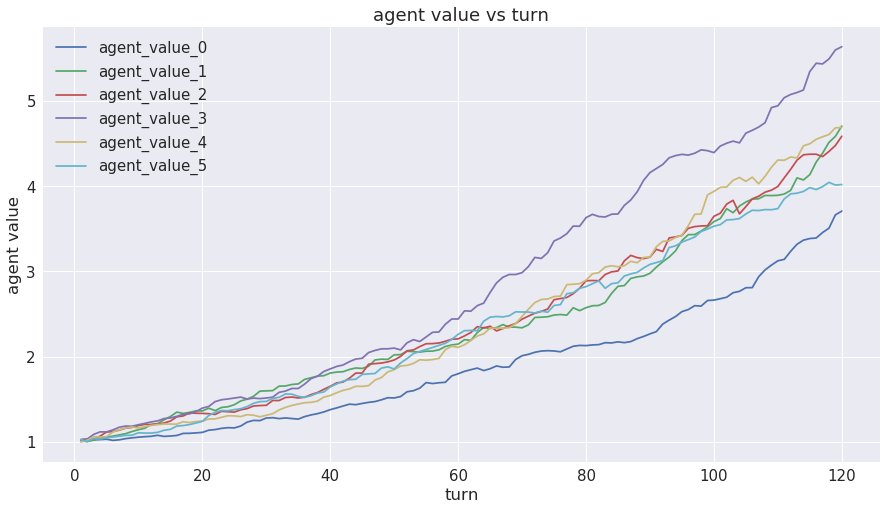

In [13]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, actions, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/N_agents')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [14]:
#play 10 games using various strategies, and generate stats for each strategy
N_games = 10
strategies = ['low', 'middle', 'high']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, actions, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  high


mean       std
strategy turn                     
middle   116   17.685837  0.274199
         117   17.856157  0.292032
         118   17.990639  0.292162
         119   18.144485  0.297788
         120   18.309006  0.306490

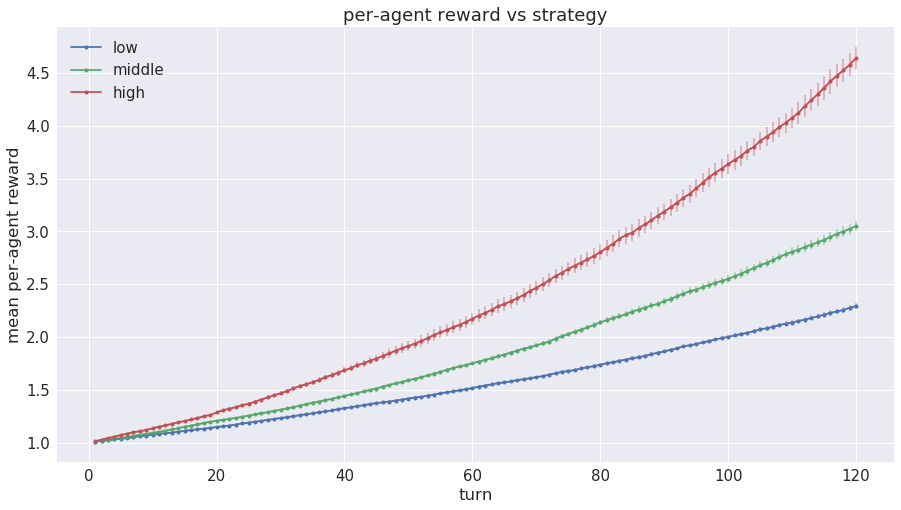

In [15]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [16]:
#play 20 random games and store moves in memories queue
N_games = 200                  #set=10*batch_size
strategy = 'random'
memories_list = []
N_memories = 0
for N_game in range(N_games):
    memories = play_game(environment, actions, strategy)
    memories_list += [memories]
    N_memories += len(memories)
memories = deque(maxlen=N_memories)
for game_memories in memories_list:
    for m in game_memories:
        memories.append(m)
print 'number of memories = ', len(memories)

number of memories =  24000


In [17]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_actions
N_neurons = 2*N_agents*N_actions
model = build_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_actions = ', N_actions
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  6
N_buckets =  60
N_actions =  60
N_inputs =  126
N_neurons =  720
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 720)               91440     
_________________________________________________________________
dense_2 (Dense)              (None, 360)               259560    
_________________________________________________________________
dense_3 (Dense)              (None, 60)                21660     
Total params: 372,660
Trainable params: 372,660
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#train model
N_training_games = 60                       #number of games played during training
gamma = 0.85                                #discount for future rewards
batch_size = 20                             #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, game, cumulative_rewards, epsilons, action_counts = \
    train(environment, model, N_training_games, gamma, memories, actions, batch_size, debug=debug)
print '\ntraining done'

batch_size =  20
training model


/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
training done


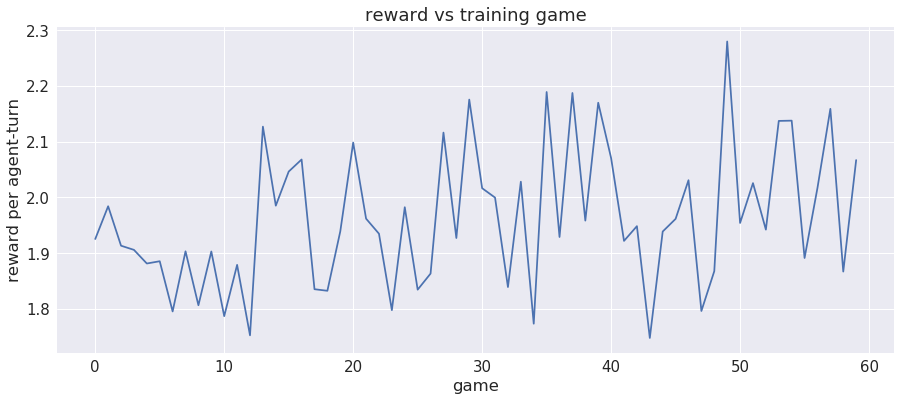

In [19]:
#plot per-agent reward vs training game
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = cumulative_rewards/N_agents/max_turns
p = ax.plot(xp, yp)
p = ax.set_title('reward vs training game')
p = ax.set_xlabel('game')
p = ax.set_ylabel('reward per agent-turn')

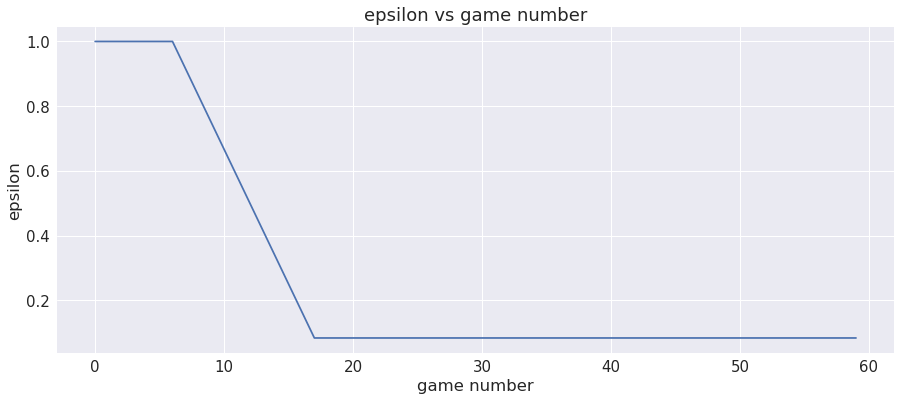

In [20]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = game
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')

In [21]:
#train 10 more times with best actions preserved each iteration
N_training_rounds = 10
actions_original = actions.copy()
for training_round in range(N_training_rounds):
    #build model
    model = build_model(N_inputs, N_neurons, N_outputs)
    #train
    trained_model, game, cumulative_rewards, epsilons, action_counts = \
        train(environment, model, N_training_games, gamma, memories, actions, batch_size, debug=debug)
    #revise actions
    action_counts_sorted = action_counts.sort_values('mean_reward', ascending=False)
    actions_top = action_counts_sorted[0:N_actions/2][actions.columns]
    actions_random = initialize_actions(N_agents, N_buckets, N_actions/2)
    actions = actions_top.append(actions_random, ignore_index=True)
    actions['action'] = actions.index
    print 'training_round = ', training_round
    print action_counts_sorted.head(10)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . training_round =  0
    action               locations  N_actions  mean_reward
49      49  26, 30, 38, 40, 41, 44        133     2.444848
12      12   9, 12, 15, 15, 31, 48         93     2.402278
46      46  11, 20, 32, 35, 51, 55         91     2.323200
51      51   2, 18, 35, 52, 57, 59        100     2.284701
58      58  25, 31, 45, 50, 57, 59        263     2.274224
47      47   6, 15, 41, 42, 49, 51        141     2.234925
54      54  27, 33, 34, 40, 45, 50        173     2.213040
42      42  16, 22, 23, 32, 45, 54         92     2.206422
40      40  12, 20, 32, 32, 41, 53        163     2.201531
30      30   2, 12, 23, 35, 43, 54         66     2.160623
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . training_round =  1
    action               locations  N_actions  mean_reward
52      52  

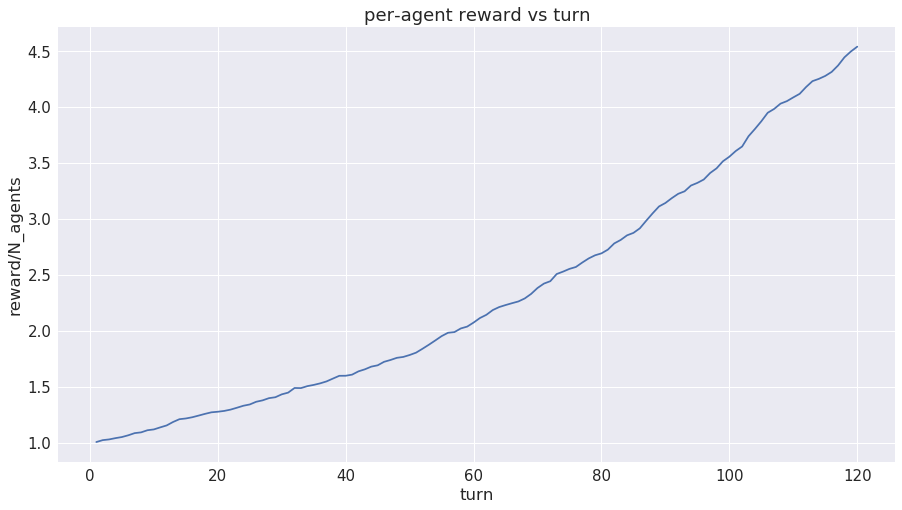

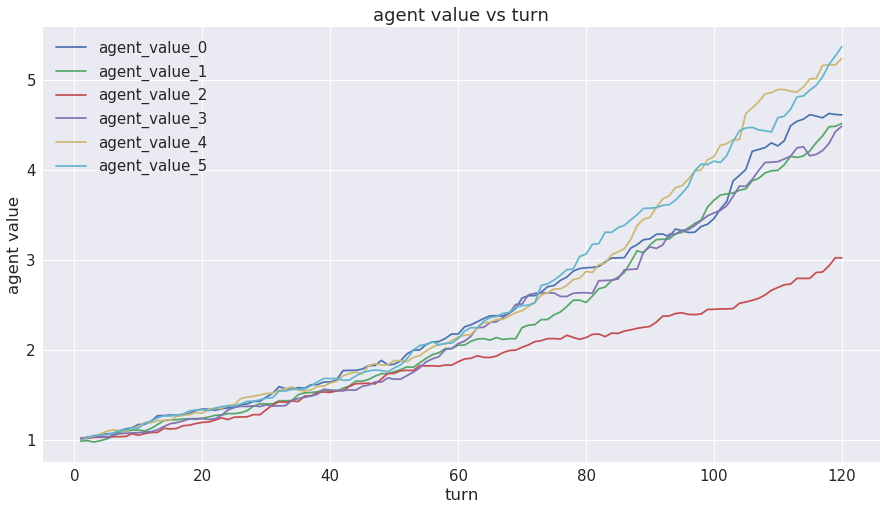

In [25]:
#play smart game with that used trained model to select best action
strategy = 'smart'
memories = play_game(environment, actions, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward/N_agents')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

strategy =  low
strategy =  middle
strategy =  high
strategy =  smart


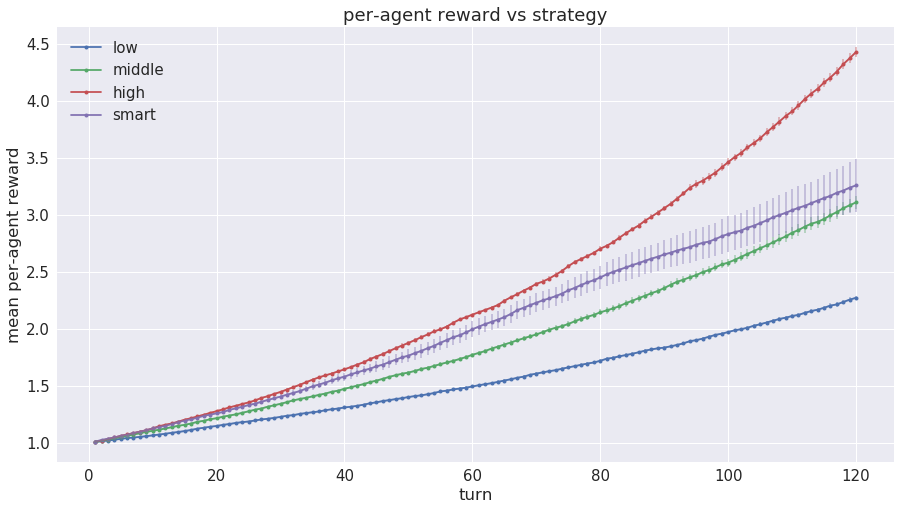

In [26]:
#play 10 games using various strategies and plot outcomes
N_games = 10
strategies = ['low', 'middle', 'high', 'smart']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        if (strategy == 'smart'):
            memories = play_game(environment, actions, strategy, model=model)
        else:
            memories = play_game(environment, actions_original, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [ ]:
##show grayscale of agent locations
#cols = [col for col in game_history.columns if ('agents_' in col)]
#df = game_history[cols]
#fig, ax = plt.subplots(1,1, figsize=(15, 6))
#plt.imshow(df.T, aspect='auto', cmap='gray')
#df.tail(10)

In [ ]:
#done!
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0